In [55]:
filename = "YELP-Results-10000-1.pkl"
dill.dump_session(filename)

In [1]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords 
from tqdm import tqdm
from collections import *
import operator
import itertools
import dill
import geopandas as gpd
import matplotlib.pyplot as plt
import descartes
from shapely.geometry import Point, Polygon
import math
from scipy import sparse
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', 500)

In [64]:
def classifyingHitRatio(hitratiolist, resultlist):
    labels_list = ['HR = 0', '(0.0,0.1)', '[0.1,0.2)', '[0.2,0.3)', '[0.3,0.4)', '[0.4,0.5)', 'HR >= 0.5']
    sHR = dict.fromkeys(labels_list,0)
    fHR = dict.fromkeys(labels_list,0)
    aHR = dict.fromkeys(labels_list,0)
    for i in range(len(hitratiolist)):
        if hitratiolist[i] == 0:
                aHR['HR = 0'] += 1
                if resultlist[i] == "Success":
                    sHR['HR = 0'] += 1
                else: 
                    fHR['HR = 0'] += 1
        elif hitratiolist[i] > 0 and hitratiolist[i] < 0.1:
                aHR['(0.0,0.1)'] += 1
                if resultlist[i] == "Success":
                    sHR['(0.0,0.1)'] += 1
                else: 
                    fHR['(0.0,0.1)'] += 1
        elif hitratiolist[i] >= 0.1 and hitratiolist[i] < 0.2:
                aHR['[0.1,0.2)'] += 1
                if resultlist[i] == "Success":
                    sHR['[0.1,0.2)'] += 1
                else: 
                    fHR['[0.1,0.2)'] += 1
        elif hitratiolist[i] >= 0.2 and hitratiolist[i] < 0.3:
                aHR['[0.2,0.3)'] += 1
                if resultlist[i] == "Success":
                    sHR['[0.2,0.3)'] += 1
                else: 
                    fHR['[0.2,0.3)'] += 1            
        elif hitratiolist[i] >= 0.3 and hitratiolist[i] < 0.4:
                aHR['[0.3,0.4)'] += 1           
                if resultlist[i] == "Success":
                    sHR['[0.3,0.4)'] += 1
                else: 
                    fHR['[0.3,0.4)'] += 1 
        elif hitratiolist[i] >= 0.4 and hitratiolist[i] < 0.5:
                aHR['[0.4,0.5)'] += 1
                if resultlist[i] == "Success":
                    sHR['[0.4,0.5)'] += 1
                else: 
                    fHR['[0.4,0.5)'] += 1 
        elif hitratiolist[i] >= 0.5:
                aHR['HR >= 0.5'] += 1
                if resultlist[i] == "Success":
                    sHR['HR >= 0.5'] += 1
                else: 
                    fHR['HR >= 0.5'] += 1 
         
    return labels_list, sHR, fHR, aHR

def toGraph(successHR, failHR, everyHR):
    successful_HR_counts = []
    failed_HR_counts = []
    overall_HR_counts = []
    for key in successHR.keys():
        successful_HR_counts.append(successHR[key])
        failed_HR_counts.append(failHR[key])
        overall_HR_counts.append(everyHR[key])
    return successful_HR_counts, failed_HR_counts, overall_HR_counts     

In [3]:
filename3 = "YELP-Test-10000-1.pkl"
dill.load_session(filename3)

### YELP - Test - 10000 - 1
Test Size = 10,568 (0.33) <br>
Words = 10,000 <br> 

In [4]:
accuracy_overall = [0.06207, 0.06964, 0.07192, 0.07419, 0.06207]
k_overall = [25, 50, 100, 200, 1500]

Text(0.5, 1.0, 'Relationship between K chosen for K-Nearest Neighbour and Accuracy (10,000 words)')

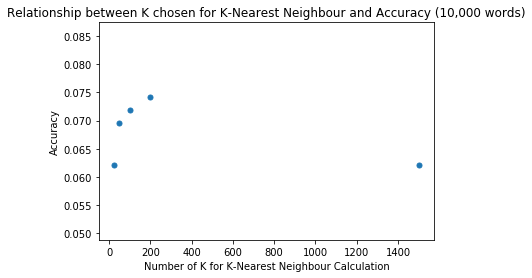

In [5]:
plt.scatter(k_overall, accuracy_overall, s=25)
plt.xlabel('Number of K for K-Nearest Neighbour Calculation')
plt.ylabel('Accuracy')
plt.title('Relationship between K chosen for K-Nearest Neighbour and Accuracy (10,000 words)')

In [67]:
labels_1_25, successfulHR_1_25, failedHR_1_25, allHR_1_25 = classifyingHitRatio(hitRatio_1_25, results_1_25)
sHR_1_25, fHR_1_25, aHR_1_25 = toGraph(successfulHR_1_25, failedHR_1_25, allHR_1_25)

In [68]:
# HR of what the correct answer is
print("Successful HR:" , successfulHR_1_25)
print("Failed HR: ", failedHR_1_25)

Successful HR: {'HR = 0': 0, '(0.0,0.1)': 26, '[0.1,0.2)': 85, '[0.2,0.3)': 44, '[0.3,0.4)': 2, '[0.4,0.5)': 4, 'HR >= 0.5': 3}
Failed HR:  {'HR = 0': 1855, '(0.0,0.1)': 570, '[0.1,0.2)': 50, '[0.2,0.3)': 3, '[0.3,0.4)': 0, '[0.4,0.5)': 0, 'HR >= 0.5': 0}


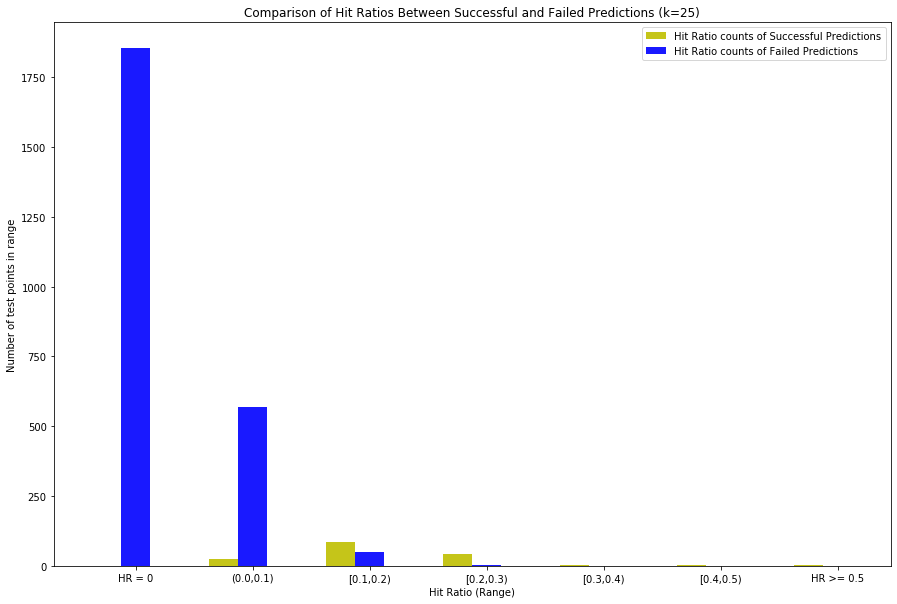

In [87]:
plt.rcParams['figure.figsize'] = [15, 10]
n_groups = len(labels_1_25)

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.9

rects1 = plt.bar(index, sHR_1_25, bar_width,
alpha=opacity,
color='y',
label='Hit Ratio counts of Successful Predictions')

rects2 = plt.bar(index + bar_width, fHR_1_25, bar_width,
alpha=opacity,
color='b',
label='Hit Ratio counts of Failed Predictions')

plt.xlabel('Hit Ratio (Range)')
plt.ylabel('Number of test points in range')
plt.title('Comparison of Hit Ratios Between Successful and Failed Predictions (k=25)')
plt.xticks(index + bar_width, labels_1_25)
plt.legend()

plt.show()

Text(0.5, 1.0, 'Total Count (Successful/Failed) of Hit Ratios for the Correct Neighbourhood (k=25)')

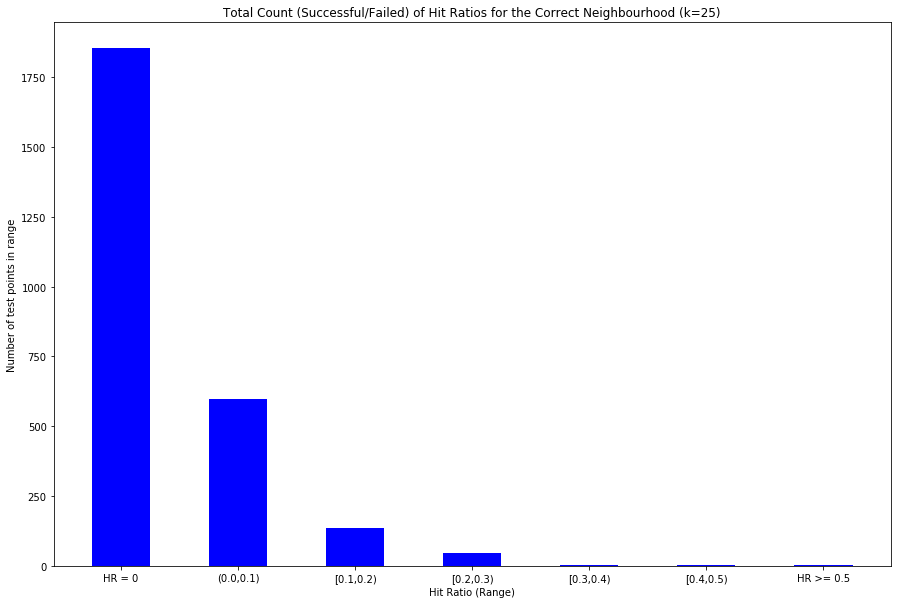

In [86]:
plt.bar(labels_1_25, aHR_1_25, 0.5, color="blue")
plt.xlabel('Hit Ratio (Range)')
plt.ylabel('Number of test points in range')
plt.title('Total Count (Successful/Failed) of Hit Ratios for the Correct Neighbourhood (k=25)')

In [74]:
labels_1_200, successfulHR_1_200, failedHR_1_200, allHR_1_200 = classifyingHitRatio(hitRatio_1_200, results_1_200)
sHR_1_200, fHR_1_200, aHR_1_200 = toGraph(successfulHR_1_200, failedHR_1_200, allHR_1_200)

In [75]:
# HR of what the correct answer is
print("Successful HR:" , successfulHR_1_200)
print("Failed HR: ", failedHR_1_200)

Successful HR: {'HR = 0': 0, '(0.0,0.1)': 130, '[0.1,0.2)': 62, '[0.2,0.3)': 4, '[0.3,0.4)': 0, '[0.4,0.5)': 0, 'HR >= 0.5': 0}
Failed HR:  {'HR = 0': 972, '(0.0,0.1)': 1467, '[0.1,0.2)': 7, '[0.2,0.3)': 0, '[0.3,0.4)': 0, '[0.4,0.5)': 0, 'HR >= 0.5': 0}


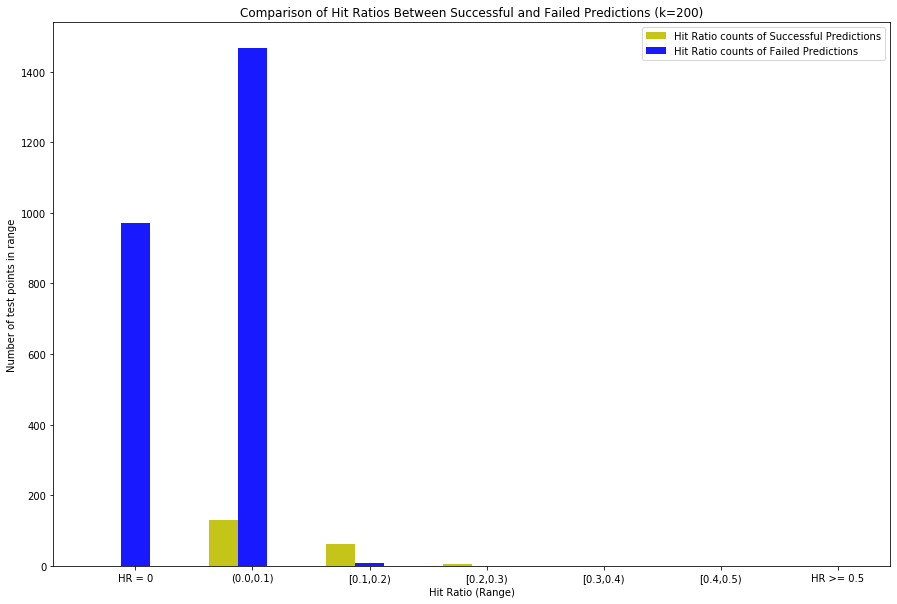

In [85]:
plt.rcParams['figure.figsize'] = [15, 10]
n_groups = len(labels_1_200)

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.9

rects1 = plt.bar(index, sHR_1_200, bar_width,
alpha=opacity,
color='y',
label='Hit Ratio counts of Successful Predictions')

rects2 = plt.bar(index + bar_width, fHR_1_200, bar_width,
alpha=opacity,
color='b',
label='Hit Ratio counts of Failed Predictions')

plt.xlabel('Hit Ratio (Range)')
plt.ylabel('Number of test points in range')
plt.title('Comparison of Hit Ratios Between Successful and Failed Predictions (k=200)')
plt.xticks(index + bar_width, labels_1_200)
plt.legend()

plt.show()

Text(0.5, 1.0, 'Total Count (Successful/Failed) of Hit Ratios for the Correct Neighbourhood (k=200)')

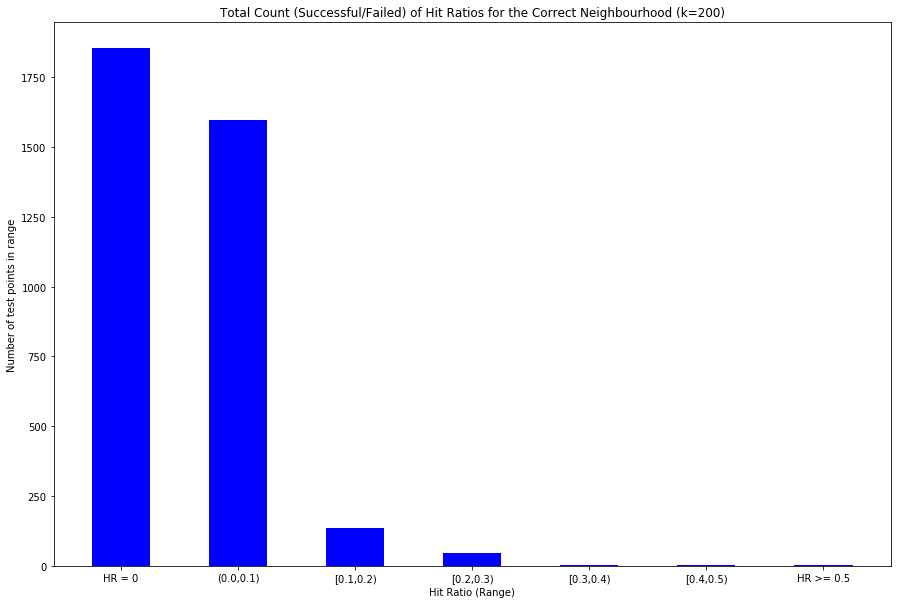

In [84]:
plt.bar(labels_1_200, aHR_1_200, 0.5, color="blue")
plt.bar(labels_1_25, aHR_1_25, 0.5, color="blue")
plt.xlabel('Hit Ratio (Range)')
plt.ylabel('Number of test points in range')
plt.title('Total Count (Successful/Failed) of Hit Ratios for the Correct Neighbourhood (k=200)')